In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import date, datetime
import re 
import seaborn as sns

In [8]:
DI1F21 = pd.read_csv('DI1F21_Diário.csv',sep=';')
DI1F23 = pd.read_csv('DI1F23_Diário.csv',sep=';')
DI1F25 = pd.read_csv('DI1F25_Diário.csv',sep=';')
DI1F27 = pd.read_csv('DI1F27_Diário.csv',sep=';')
DI1F29 = pd.read_csv('DI1F29_Diário.csv',sep=';')

In [9]:
def regex(x):
    num = re.sub(r',',".",x)
    #var = num.replace('.',"")
    return num

def percentual_variacao(x):  
    array = np.array(x['Fechamento'].apply(regex).astype(float))
    array_2 = np.array(x['Fechamento'][1:].apply(regex).astype(float))
    atual = []
    for i in range(len(array_2)):
        aux = ((array_2[i] - array[i])/array_2[i]) * 100 
        atual.append(aux)
    atual.insert(0,0)
    return atual

#print(len(percentual_variacao(DI1F29)))
DI1 = [DI1F21,DI1F23,DI1F25,DI1F27,DI1F29]
for i in DI1:
    i['Data'] = i['Data'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
    i.sort_values('Data',ascending=True,inplace=True)
    i['Var. Dia'] = percentual_variacao(i)



In [10]:
DI1 = pd.concat([DI1F21,DI1F23,DI1F25,DI1F27,DI1F29])

In [40]:
plotagem = DI1.sort_values('Data',ascending=True).tail(150)
plotagem = plotagem.loc[:,['Data','Ativo','Fechamento']]
plotagem['Fechamento'] = plotagem['Fechamento'].str.replace(',','.').astype(float)

In [87]:
plotagem = plotagem[plotagem['Data'].dt.weekday == 0]
plotagem

,Data,Ativo,Fechamento
27,2020-04-20,DI1F23,4.370
27,2020-04-20,DI1F25,5.960
27,2020-04-20,DI1F21,2.840
27,2020-04-20,DI1F27,6.830
27,2020-04-20,DI1F29,7.350
23,2020-04-27,DI1F29,8.930
23,2020-04-27,DI1F23,5.700
23,2020-04-27,DI1F21,3.200
23,2020-04-27,DI1F27,8.460
23,2020-04-27,DI1F25,7.500


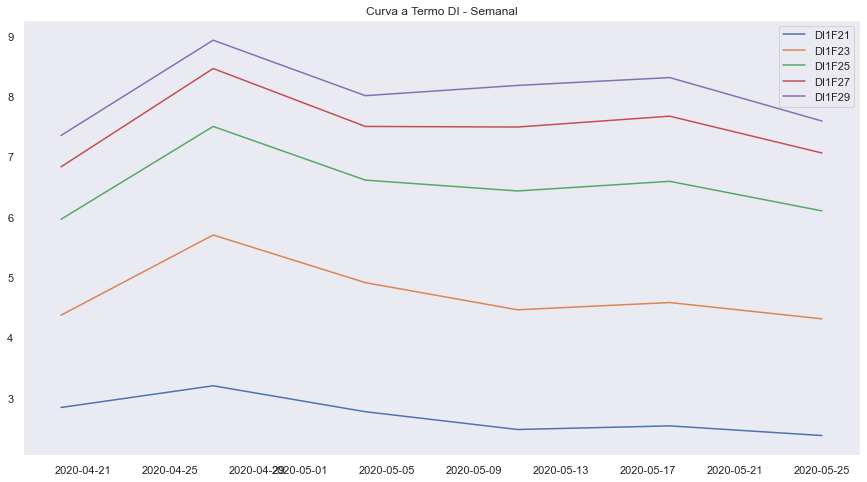

In [91]:
sns.set()
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,8)
plt.title('Curva a Termo DI - Semanal')
plt.plot(plotagem.query('Ativo =="DI1F21"')['Data'],plotagem.query('Ativo =="DI1F21"')['Fechamento'],label='DI1F21')
plt.plot(plotagem.query('Ativo =="DI1F23"')['Data'],plotagem.query('Ativo =="DI1F23"')['Fechamento'],label='DI1F23')
plt.plot(plotagem.query('Ativo =="DI1F25"')['Data'],plotagem.query('Ativo =="DI1F25"')['Fechamento'],label='DI1F25')
plt.plot(plotagem.query('Ativo =="DI1F27"')['Data'],plotagem.query('Ativo =="DI1F27"')['Fechamento'],label='DI1F27')
plt.plot(plotagem.query('Ativo =="DI1F29"')['Data'],plotagem.query('Ativo =="DI1F29"')['Fechamento'],label='DI1F29')
plt.grid(False)
plt.legend()
plt.show()

